In [1]:
#CSE 351 Final Project
#Project #2
#Code by Dylan Gold and Varun Vaidhyanathan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
#Bring in our librarys

In [3]:
#Bring in our dataframes, test_data with our testing data and train_data with our training data.
original_test_data = pd.read_csv('titanic/test.csv') 
original_train_data = pd.read_csv('titanic/train.csv')
test_d = original_test_data.copy()#Create copys to modify.
train_d = original_train_data.copy()

# Cleaning the data:

In [4]:
train_d.info() # Look to see if we have null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#We can see that we have null values in age, cabin, and embarked in our training data.
train_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_d = train_d.sort_values(by = "Age")
#We can sort the values by age to see the min ages aswell as how ages are null.

In [7]:
#We can replace null ages with the median age. This uses median imputing.
#We decided to use median over average because there were a lot of small ages of those under 5 and we though that median would
#Better represent a skewed dataset.
median_age = train_d['Age'].median()#get the median age
train_d['Age'] = train_d['Age'].fillna(median_age)
train_d = train_d.sort_values(by = "Age") #Resort
train_d.tail()
#Now are ages are imputed.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S


In [8]:
#We also saw that there were many null values for cabin.
#People who had no specific cabin could have been part of the crew or lower class.
#We opted to replace the null cabin values with "Unspecified".

In [9]:
train_d.sort_values(by = "Cabin")
train_d['Cabin'].fillna('Unspecified', inplace = True)
train_d.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Unspecified,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,Unspecified,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,Unspecified,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S


In [10]:
#We also saw that 2 values of embarked were left null. Because such a small part of our data was left unmarked here
#We just replaced it with the mode of the embarked column.
mode_embarked = train_d['Embarked'].mode()#get the mode embarked
#the mode of the embarked column is S
train_d['Embarked'] = train_d['Embarked'].fillna('S') #Fill in null values with S
train_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 803 to 630
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [11]:
#We have now made it so our data does not contain null values.

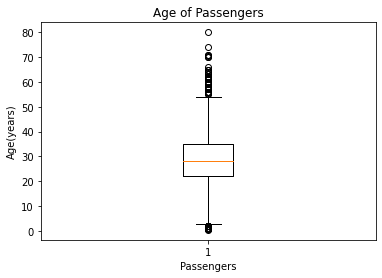

In [12]:
train_d = train_d.sort_values(by = "Age")#Look at age for outliers.
plt.boxplot(train_d["Age"])
plt.ylabel("Age(years)")
plt.xlabel("Passengers")
plt.title("Age of Passengers")
plt.show()

In [13]:
#The max value of age was 80, we did not feel the need to remove any rows based on their age.
#There were many data points outside of the IQR but we did not feel the need to remove these because there were so many.

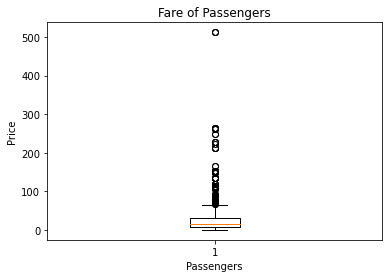

In [14]:
#We can look at the fares aswell for outlier detection
plt.boxplot(train_d["Fare"])
plt.ylabel("Price")
plt.xlabel("Passengers")
plt.title("Fare of Passengers")
plt.show()

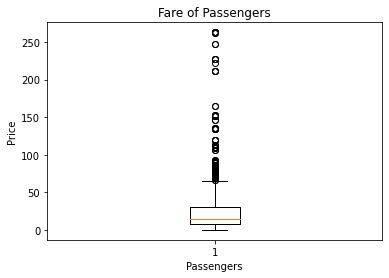

In [15]:
#Here we see that we have many outliers. We opted to keep in all the outliers except for the data point over 500.
train_d = train_d.sort_values(by = "Fare")#Look at fare for outliers.
train_d.drop(train_d[train_d.Fare > 500].index, inplace=True) #Drop fares greater than 500.
plt.boxplot(train_d["Fare"])
plt.ylabel("Price")
plt.xlabel("Passengers")
plt.title("Fare of Passengers")
plt.show()

# Exploring correlations between variables:

Text(0.5, 1.0, 'Correlation HeatMap')

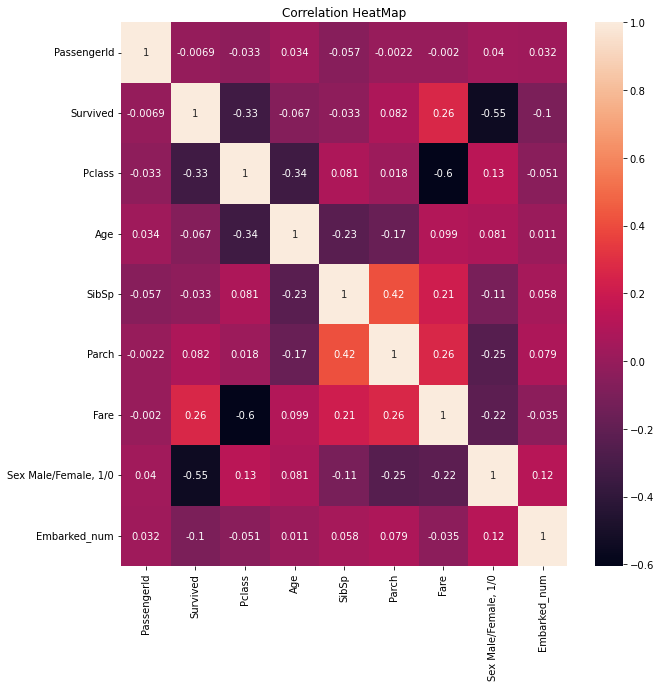

In [16]:
#Create dictionaries to map some of our non integer values to integers.
#By doing this we can extract information from some of our non-integer columns.
sex_dict = {"male" : 1, "female" : 0}
train_d['Sex Male/Female, 1/0'] = train_d['Sex'] #Create a copy of sex column
train_d['Sex Male/Female, 1/0'] = train_d['Sex'].replace(sex_dict)

embarked_dict = {"Q" : 0, "C" : 1, "S" : 2}
train_d['Embarked_num'] = train_d['Embarked'] #Create a copy of embarked column
train_d['Embarked_num'] = train_d['Embarked'].replace(embarked_dict)

#Create the heat map with the data.
plt.figure(figsize=(10, 10))
correlations = sns.heatmap(train_d.corr(method = 'pearson'), annot = True) #Run the pearson
correlations.set_title("Correlation HeatMap")

In [17]:
#We can see that there are a few key correlations using a correlation heatmap.

#We can look at how a persons socio-economic status effected other variables.
#For the most part we do not see much correlation between Pclass and most other variables like Sex or where they embarked from.
# or number of family members on board

[Text(0.5, 1.0, 'Fare vs Pclass')]

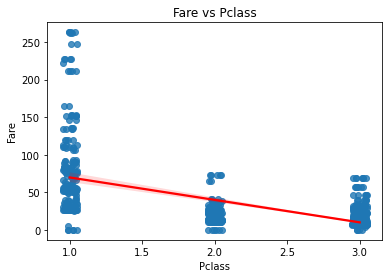

In [18]:
#The highest correlation we see is a negative correlation between the fare and the Pclass variables of -0.6
#This leads us to believe that those with higher fares, got a Pclass with a lower number.
#Pclasses with a lower number indicates a higher class, for example Pclass 1 is first class.
#This correlation makes sense, we would expect those with better socio-economic statuses(ie better classes) to be able to afford better seats..
sns.regplot(x=train_d["Pclass"], y=train_d["Fare"], x_jitter = .05, line_kws={"color": "red"}).set(title='Fare vs Pclass')

[Text(0.5, 1.0, 'Pclass vs Age')]

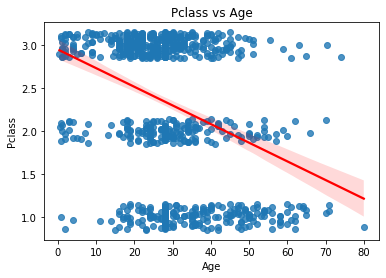

In [19]:
#We also see that there is a correlation between ones age and the class they were in. We get a negative correlation of 
#.34 this shows that people at a higher age tended to be higher class and those at a younger age were in a lower class.
#
sns.regplot(x=train_d["Age"], y=train_d["Pclass"], line_kws={"color": "red"}, y_jitter = .15).set(title='Pclass vs Age')

Text(0.5, 1.0, 'Sex and Survival Count')

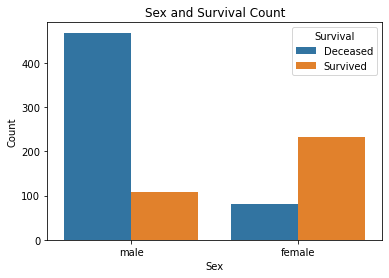

In [20]:
#We can also look at how different variables correlate with survival rate.

#We can see that many things did not have a strong correlation with survival rate in our heatmap.
#For example the correlation between the survived and age is very low. We found this to be surprising that age was not very imporant as a factor.
#The highest correlations with survival were our Pclass and Sex variables.
surv_dict = {1 : "Survived", 0 : "Deceased"}

surv_sex = train_d[['Survived', 'Sex']].copy()
surv_sex = surv_sex.sort_values(by = "Sex")
surv_sex['Survived'] = surv_sex['Survived'].replace(surv_dict)
surv_sex_count = pd.DataFrame(surv_sex.value_counts().reset_index().values, columns=["Survival","Sex", "Count"])
sns.barplot(x="Sex", y="Count", hue="Survival", data=surv_sex_count).set_title("Sex and Survival Count")

#We can see in the graph below that Sex had a correlation with survival. We can see that most men died on the titanic while a large proportion of women survived the titanic.

Text(0.5, 1.0, 'Pclass and Survival Count')

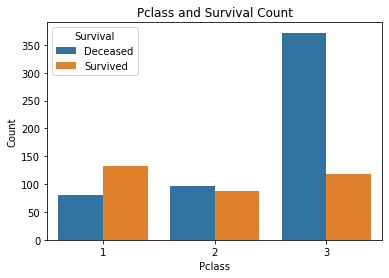

In [21]:
#We can see in the our heatmap that there was also a relatively high correlation between our Pclass and survival rate.
#sns.regplot(x=train_d["Pclass"], y=train_d["Survived"], x_jitter = .1,y_jitter = .1, line_kws={"color": "red"}, scatter_kws={'alpha':0.2}).set(title='Survival vs Pclass')
#SURVIVAL VS PCLASS BAR GRAPH

surv_pclass = train_d[['Survived', 'Pclass']].copy()
surv_pclass = surv_pclass.sort_values(by = "Pclass")
surv_pclass['Survived'] = surv_pclass['Survived'].replace(surv_dict)
surv_pclass_count = pd.DataFrame(surv_pclass.value_counts().reset_index().values, columns=["Survival","Pclass", "Count"])
sns.barplot(x="Pclass", y="Count", hue="Survival", data=surv_pclass_count).set_title("Pclass and Survival Count")

#Below is a graph of the count of those who survived and did not survive for each passenger class. 
#We can see that there is a correlation between Pclass and survival rate. Only in first class is the number of those who survived greater than those who did not.
#We can also see that in the lower class, third class, not even close to half of the passengers survived.

# Modeling And Question Answering

In [22]:
#The testing data we were given was missing some columns so instead,
#To start off we have to split our data into both testing and training sets. We will train our models with the training set.
#We will also evaluate how well these models do by using the training set.
training=train_d.sample(frac=0.8,random_state=80) #Makes a traing set with a random sample(80%)with a random state that is a key
testing=train_d.drop(training.index) #Create a testing set by dropping the training set from the original
#We now have a randomly sampled training and testing set from the original data.

In [23]:
#For our first regression we will create a logistic regression model that predicts survival with:
# 'Pclass','Age','Fare','SibSp','Parch','Sex Male/Female, 1/0' in that order
training_ind1 = training[['Pclass','Age','Fare','SibSp','Parch','Sex Male/Female, 1/0']].copy()
training_dep1 = training[['Survived']].copy()
logreg1 = linear_model.LogisticRegression().fit(training_ind1, training_dep1)
print(f"We have the following coeffiecents for our logistic regression :\n",logreg1.coef_)

We have the following coeffiecents for our logistic regression :
 [[-1.15637718e+00 -4.00172918e-02 -1.29360958e-04 -2.95498698e-01
  -1.12167066e-01 -2.69547617e+00]]


C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
#This model works by taking in many parameters (listed above) and predicting wether or not someone survived with this.
#We opted to use a logistic regression over a linear regression because our output was binary, 0/1.

In [25]:
#Now that we have a model we can test the model with the data the testing portion of our data that we split.
testing1 = testing[['Pclass','Age','Fare','SibSp','Parch','Sex Male/Female, 1/0']].copy()
testing1['Predicted Survival'] = logreg1.predict(testing1[list(testing1.columns)])
testing1['Actual Survival'] = testing['Survived']
testing1.head(20)

,Pclass,Age,Fare,SibSp,Parch,"Sex Male/Female, 1/0",Predicted Survival,Actual Survival
732,2,28.0,0.0000,0,0,1,0,0
413,2,28.0,0.0000,0,0,1,0,0
806,1,39.0,0.0000,0,0,1,0,0
263,1,40.0,0.0000,0,0,1,0,0
481,2,28.0,0.0000,0,0,1,0,0
371,3,18.0,6.4958,1,0,1,0,0
129,3,45.0,6.9750,0,0,1,0,0
884,3,25.0,7.0500,0,0,1,0,0
210,3,24.0,7.0500,0,0,1,0,0
26,3,28.0,7.2250,0,0,1,0,0


In [26]:
#We can see from a quick scan that the model did an alright job but,
#we can better evaulate the model using things like: Precision, Recall, Fscore.

from sklearn.metrics import f1_score   
from sklearn.metrics import precision_score #Import these functions from sklearn.metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

fscore1 = f1_score(testing1['Actual Survival'], testing1['Predicted Survival'])
precision1 = precision_score(testing1['Actual Survival'], testing1['Predicted Survival']) #Get our scores
recall1 = recall_score(testing1['Actual Survival'], testing1['Predicted Survival'])
accuracy1 = recall_score(testing1['Actual Survival'], testing1['Predicted Survival'])

print(f"After using a logistic regression for predicting survial:\n We get an precision score of:", precision1)
print(f" We get an recall score of:", recall1)
print(f" We get an accuracy score of:", accuracy1)
print(f" We get an f-score of:", fscore1)

After using a logistic regression for predicting survial:
 We get an precision score of: 0.71875
 We get an recall score of: 0.7540983606557377
 We get an accuracy score of: 0.7540983606557377
 We get an f-score of: 0.7359999999999999


In [27]:
#We can compare this result to a result obtained using k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

trainingkfoldx1 = train_d[['Pclass','Age','Fare','SibSp','Parch','Sex Male/Female, 1/0']].copy()
trainingkfoldy1 = train_d[['Survived']].copy()

k = 5 #number of splits
kf = model_selection.KFold(n_splits=k);
model1 = linear_model.LogisticRegression(max_iter=300) 

result = cross_val_score(model1 , trainingkfoldx1, trainingkfoldy1, cv = kf) #Get the results from a cross validation.

print(f"The avg accuracy using 5 fold for cross validation:", (result.mean()))

The avg accuracy using 5 fold for cross validation: 0.7780549736558117


C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [28]:
#This is overall a pretty decent model for predicting survival.
#The best indication on whether or not this model did well is the f-score.
#We got a decent f-score for our model.
#This makes sense because we saw correlations between some factors and survival, for example the individual's sex.


In [29]:
#For our second regression we can try to create a linear regression that predicts the value of Fare.
#We can use 'Pclass','Age','SibSp','Parch','Sex Male/Female, 1/0' as input for our model.
training_ind2 = training[['Pclass','Age','SibSp','Parch','Sex Male/Female, 1/0']].copy()
training_dep2 = training[['Fare']].copy()
linreg2 = linear_model.LinearRegression()
linreg2.fit(training_ind2, training_dep2)
print(f"We have the following coeffiecents for our linear regression :\n",linreg2.coef_)
print(f"and our intercept as:", linreg2.intercept_)

We have the following coeffiecents for our linear regression :
 [[-30.32410525  -0.08378582   6.63308605   8.3750849   -5.55014021]]
and our intercept as: [99.4306978]


In [30]:
#Now that we have a model we can test the model with the data the testing portion of our data that we split.
testing2 = testing[['Pclass','Age','SibSp','Parch','Sex Male/Female, 1/0']].copy()
testing2['Predicted Fare'] = linreg2.predict(testing2[list(testing2.columns)])
testing2['Original Fare'] = testing['Fare']
testing2.tail(20)

,Pclass,Age,SibSp,Parch,"Sex Male/Female, 1/0",Predicted Fare,Original Fare
275,1,63.00,1,0,0,70.461172,77.9583
741,1,36.00,1,0,1,67.173249,78.8500
587,1,60.00,1,1,1,73.537474,79.2000
375,1,28.00,1,0,0,73.393676,82.1708
34,1,28.00,1,0,1,67.843536,82.1708
820,1,52.00,1,1,0,79.757901,93.5000
537,1,30.00,0,0,0,66.593018,106.4250
505,1,18.00,1,0,1,68.681394,108.9000
307,1,17.00,1,0,0,74.315320,108.9000
550,1,17.00,0,2,1,78.882263,110.8833


In [31]:
from sklearn.metrics import mean_squared_error
msr = (mean_squared_error(testing2['Original Fare'], testing2['Predicted Fare']))
rmsr = np.sqrt(msr)
print(f"The root mean squared error of our fare prediction is:", rmsr)

The root mean squared error of our fare prediction is: 31.437092699249995


In [32]:
#This model did not do the best job predicting the fare.
#Our root mean squared error gave us an error that high considering the data. 
#For our fare to be off by this much could mean that there was not a very strong correlation between
#the other data points and the fare. 


In [33]:
#For our third regression we can create a logistic model that predicts the Pclass value
#This model uses the following columns as input: 'Age','Fare','SibSp','Parch','Sex Male/Female, 1/0'
training_ind3 = training[['Age','Fare','SibSp','Parch','Sex Male/Female, 1/0']].copy()
training_dep3 = training[['Pclass']].copy()

logreg3 = linear_model.LogisticRegression(max_iter=300).fit(training_ind3, training_dep3) #We increased the max_iter for this.
print(f"We have the following coeffiecents for our logistic regression :\n",logreg3.coef_)

We have the following coeffiecents for our logistic regression :
 [[ 0.03979014  0.13873481 -1.66693499 -0.88149764  0.05874881]
 [-0.01133195  0.020323    0.23440906  0.0563272  -0.28304726]
 [-0.02845818 -0.15905781  1.43252593  0.82517044  0.22429845]]


C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
#Now that we created a model for predicting the Pclass value of
testing3 = testing[['Age','Fare','SibSp','Parch','Sex Male/Female, 1/0']].copy()
testing3['Predicted Class'] = logreg3.predict(testing3[list(testing3.columns)])
testing3['Actual Class'] = testing['Pclass']
testing3.tail(20)

,Age,Fare,SibSp,Parch,"Sex Male/Female, 1/0",Predicted Class,Actual Class
275,63.00,77.9583,1,0,0,1,1
741,36.00,78.8500,1,0,1,1,1
587,60.00,79.2000,1,1,1,1,1
375,28.00,82.1708,1,0,0,1,1
34,28.00,82.1708,1,0,1,1,1
820,52.00,93.5000,1,1,0,1,1
537,30.00,106.4250,0,0,0,1,1
505,18.00,108.9000,1,0,1,1,1
307,17.00,108.9000,1,0,0,1,1
550,17.00,110.8833,0,2,1,1,1


In [35]:
#It is difficult to see how well the model did by just looking at it because all the values are 1 here.
#we can better evaulate the model using things like: Precision, Recall, Fscore.
#Because our data is not binary we can use the micro parameter for the average value in sklearn.metrics.
#This makes it so both our precision and recall are the ratio of (correct classifactions/all classifcations)
#This will let us evaulate a non binary classification in a good way.
fscore3 = f1_score(testing3['Actual Class'], testing3['Predicted Class'], average = 'micro')
precision3 = precision_score(testing3['Actual Class'], testing3['Predicted Class'], average = 'micro')
recall3 = recall_score(testing3['Actual Class'], testing3['Predicted Class'], average = 'micro')

print(f"After using a logistic regression for predicting the class:\n we get an precision score of:", precision3)
print(f" We get an recall score of:", recall3)
print(f" We get an f score of:", fscore3)

After using a logistic regression for predicting the class:
 we get an precision score of: 0.8258426966292135
 We get an recall score of: 0.8258426966292135
 We get an f score of: 0.8258426966292135


In [36]:
#Our model was able to pretty accurately determine the class of the indivdual based on other features.